# Dog Vs cat classifier
- We are working with complete dataset

In [91]:

#importing libraries 
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [92]:
#image properties
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [93]:
#datasetfor training
data_dir_path = "temp/data_cats_dogs_complete"

train_dir_path = os.path.join(data_dir_path,"train")
filenames=os.listdir(train_dir_path)
print(f"Total number of images:{len(filenames)}")

categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)

df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

print(df)

Total number of images:19989
            filename  category
0          cat.1.jpg         0
1         cat.10.jpg         0
2        cat.100.jpg         0
3       cat.1000.jpg         0
4      cat.10000.jpg         0
...              ...       ...
19984   dog.9993.jpg         1
19985   dog.9994.jpg         1
19986   dog.9995.jpg         1
19987   dog.9997.jpg         1
19988   dog.9998.jpg         1

[19989 rows x 2 columns]


In [94]:
#datasetfor test
test_dir_path = os.path.join(data_dir_path,"test")
filenames=os.listdir(test_dir_path)

categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)

test_df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

print(test_df)

           filename  category
0         cat.0.jpg         0
1     cat.10003.jpg         0
2     cat.10004.jpg         0
3     cat.10008.jpg         0
4     cat.10013.jpg         0
...             ...       ...
4995   dog.9965.jpg         1
4996   dog.9968.jpg         1
4997   dog.9992.jpg         1
4998   dog.9996.jpg         1
4999   dog.9999.jpg         1

[5000 rows x 2 columns]


In [95]:
test_df['category'].nunique()

2

In [96]:
#neural network
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

c:\Users\hi\Desktop\projects\python_projects\tutorial\tut_tensorflow\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
#analysing neural network
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [98]:
#callbacks and learning rate
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [99]:
#dataframe management 
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

print(train_df)
print("@@@@@@@@@@@@@@@@@@@@@@")
print(validate_df)
print("#####################")
print(test_df)


            filename category
0      dog.10906.jpg      dog
1      dog.10783.jpg      dog
2      cat.10920.jpg      cat
3       dog.7430.jpg      dog
4       dog.2568.jpg      dog
...              ...      ...
15986  dog.11455.jpg      dog
15987  dog.12226.jpg      dog
15988   cat.4746.jpg      cat
15989  cat.10944.jpg      cat
15990   dog.5287.jpg      dog

[15991 rows x 2 columns]
@@@@@@@@@@@@@@@@@@@@@@
           filename category
0      dog.1585.jpg      dog
1      cat.5974.jpg      cat
2     cat.12002.jpg      cat
3     dog.12337.jpg      dog
4      dog.1684.jpg      dog
...             ...      ...
3993   dog.3746.jpg      dog
3994  cat.10215.jpg      cat
3995  cat.10568.jpg      cat
3996    cat.391.jpg      cat
3997   cat.5179.jpg      cat

[3998 rows x 2 columns]
#####################
           filename  category
0         cat.0.jpg         0
1     cat.10003.jpg         0
2     cat.10004.jpg         0
3     cat.10008.jpg         0
4     cat.10013.jpg         0
...             

In [100]:
#data generation
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                            # "./train/train/",
                                            train_dir_path,
                                            x_col='filename',
                                            y_col='category',
                                            target_size=Image_Size,
                                            class_mode='categorical',
                                            batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    # "./train/train/",
    train_dir_path,
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)


Found 15991 validated image filenames belonging to 2 classes.
Found 3998 validated image filenames belonging to 2 classes.


In [24]:
#training
epochs=10 # Took 20-30 minutes
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

c:\Users\hi\Desktop\projects\python_projects\tutorial\tut_tensorflow\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 478s 445ms/step - accuracy: 0.5802 - loss: 1.0359 - val_accuracy: 0.7160 - val_loss: 0.5544 - learning_rate: 0.0010
Epoch 2/10


c:\Users\hi\Desktop\projects\python_projects\tutorial\tut_tensorflow\.venv\Lib\site-packages\keras\src\callbacks\callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


   1/1066 ━━━━━━━━━━━━━━━━━━━━ 4:55 277ms/step - accuracy: 0.4000 - loss: 0.8661

c:\Users\hi\Desktop\projects\python_projects\tutorial\tut_tensorflow\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1066/1066 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.4000 - loss: 0.8661 - val_accuracy: 0.7243 - val_loss: 0.5404 - learning_rate: 0.0010
Epoch 3/10
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 320s 300ms/step - accuracy: 0.6789 - loss: 0.6046 - val_accuracy: 0.7331 - val_loss: 0.5395 - learning_rate: 0.0010
Epoch 4/10
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.7333 - loss: 0.6003 - val_accuracy: 0.7098 - val_loss: 0.5953 - learning_rate: 0.0010
Epoch 5/10
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 317s 297ms/step - accuracy: 0.7357 - loss: 0.5400 - val_accuracy: 0.7642 - val_loss: 0.4968 - learning_rate: 0.0010
Epoch 6/10
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.7333 - loss: 0.3916 - val_accuracy: 0.7782 - val_loss: 0.4761 - learning_rate: 0.0010
Epoch 7/10
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 324s 304ms/step - accuracy: 0.7543 - loss: 0.5101 - val_accuracy: 0.7612 - val_loss: 0.5233 - learning_rate: 0.0010
Epoch 8/10
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0

In [ ]:
#saving model so we do not have to train again.
model_path = "temp/saved_models/"

model_name =  os.path.join(model_path,"model1_catdog_10epoch.h5")
weight_name = os.path.join(model_path,"model1_catdog_10epoch.weights.h5")

model.save(model_name)

# model.save_weights(weight_name) 

In [102]:
#Now we load the model
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model(model_name)

# model.load_weights(weight_name)

In [104]:
#test data
test_filenames = os.listdir(test_dir_path)

test_df = pd.DataFrame({
    'filename': test_filenames
})

print(f"test_df:\n {test_df}")
print(f"Number of samples:{test_df.shape[0]} ")

test_df:
            filename
0         cat.0.jpg
1     cat.10003.jpg
2     cat.10004.jpg
3     cat.10008.jpg
4     cat.10013.jpg
...             ...
4995   dog.9965.jpg
4996   dog.9968.jpg
4997   dog.9992.jpg
4998   dog.9996.jpg
4999   dog.9999.jpg

[5000 rows x 1 columns]
Number of samples:5000 


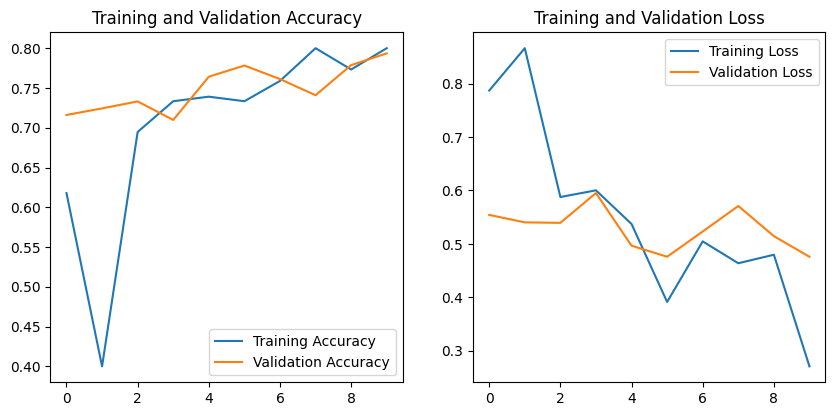

In [105]:
#visualization 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [73]:
# In following it shaows 2 values:
# 1st value: Loss ( lower the better)
# 2nd value show acuracy (Higher the better)
model.evaluate(x=train_generator) # Took 3 minutes

1067/1067 ━━━━━━━━━━━━━━━━━━━━ 114s 106ms/step - accuracy: 0.7518 - loss: 0.5902


[0.6010172367095947, 0.7474204301834106]

In [74]:
print(test_df)

           filename
0         cat.0.jpg
1     cat.10003.jpg
2     cat.10004.jpg
3     cat.10008.jpg
4     cat.10013.jpg
...             ...
4995   dog.9965.jpg
4996   dog.9968.jpg
4997   dog.9992.jpg
4998   dog.9996.jpg
4999   dog.9999.jpg

[5000 rows x 1 columns]


In [107]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to load and preprocess images
def load_and_preprocess_image(filename):
    img_path = os.path.join(test_dir_path,filename)  # Full path to image
    img = load_img(img_path, target_size=(Image_Width, Image_Height))  # Load image
    img_array = img_to_array(img)  # Convert to NumPy array
    img_array = img_array / 255.0  # Normalize pixel values (if your model was trained with normalization)
    return img_array

# Load all test images into a NumPy array
test_images = np.array([load_and_preprocess_image(fname) for fname in test_df["filename"]])

# Make predictions
predictions = model.predict(test_images)

# Print predictions
print(predictions)


157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step
[[0.9369258  0.06307417]
 [0.53495485 0.46504518]
 [0.84811074 0.15188928]
 ...
 [0.3456986  0.6543014 ]
 [0.16508086 0.83491915]
 [0.91240466 0.08759542]]


In [108]:
#convert into df
predict = pd.DataFrame(predictions)
print(predict)

             0         1
0     0.936926  0.063074
1     0.534955  0.465045
2     0.848111  0.151889
3     0.428076  0.571924
4     0.178163  0.821837
...        ...       ...
4995  0.041127  0.958873
4996  0.003600  0.996400
4997  0.345699  0.654301
4998  0.165081  0.834919
4999  0.912405  0.087595

[5000 rows x 2 columns]


In [109]:
#convertion of labels to categories
test_df['predicted_category'] = np.argmax(predict, axis=-1)
test_df['actual_category'] = test_df['filename'].str.split('.').str[0]
test_df['actual_category'] = test_df['actual_category'].replace({ 'dog': 1, 'cat': 0 })
print(test_df)

           filename  predicted_category  actual_category
0         cat.0.jpg                   0                0
1     cat.10003.jpg                   0                0
2     cat.10004.jpg                   0                0
3     cat.10008.jpg                   1                0
4     cat.10013.jpg                   1                0
...             ...                 ...              ...
4995   dog.9965.jpg                   1                1
4996   dog.9968.jpg                   1                1
4997   dog.9992.jpg                   1                1
4998   dog.9996.jpg                   1                1
4999   dog.9999.jpg                   0                1

[5000 rows x 3 columns]


C:\Users\hi\AppData\Local\Temp\ipykernel_10592\1483800665.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['actual_category'] = test_df['actual_category'].replace({ 'dog': 1, 'cat': 0 })


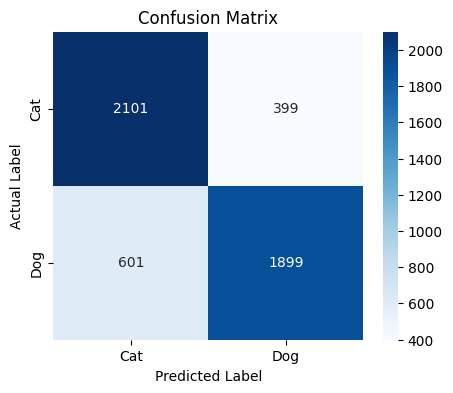

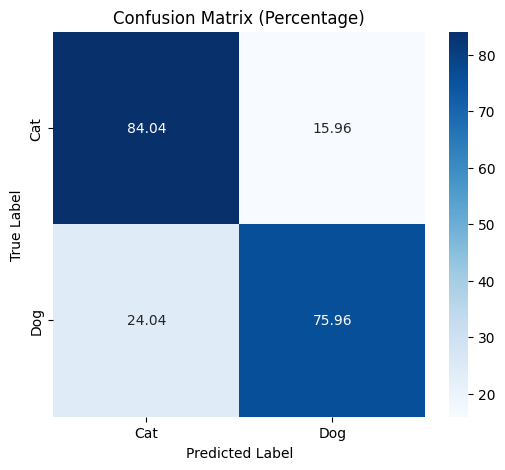

In [110]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(test_df['actual_category'], test_df['predicted_category'])

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Normalize confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Percentage)")
plt.show()


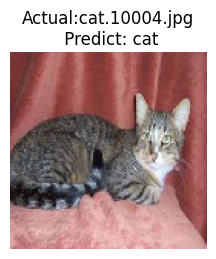

In [113]:
#Lets look at 1 image
# sample_test = test_df.iloc[3] # SHOW THIS IN CLASS
sample_test = test_df.iloc[2]


plt.figure(figsize=(15,15))

file_name = sample_test['filename']
pred_category = sample_test['predicted_category']
path = os.path.join(test_dir_path, file_name)
img = load_img(path, target_size=(Image_Width,Image_Height))
plt.subplot(6,6,index+1)
plt.imshow(img)
plt.title(f"Actual:{file_name}\n Predict: {'cat' if pred_category==0 else 'dog'}")
plt.axis('off')

plt.tight_layout()
plt.show()

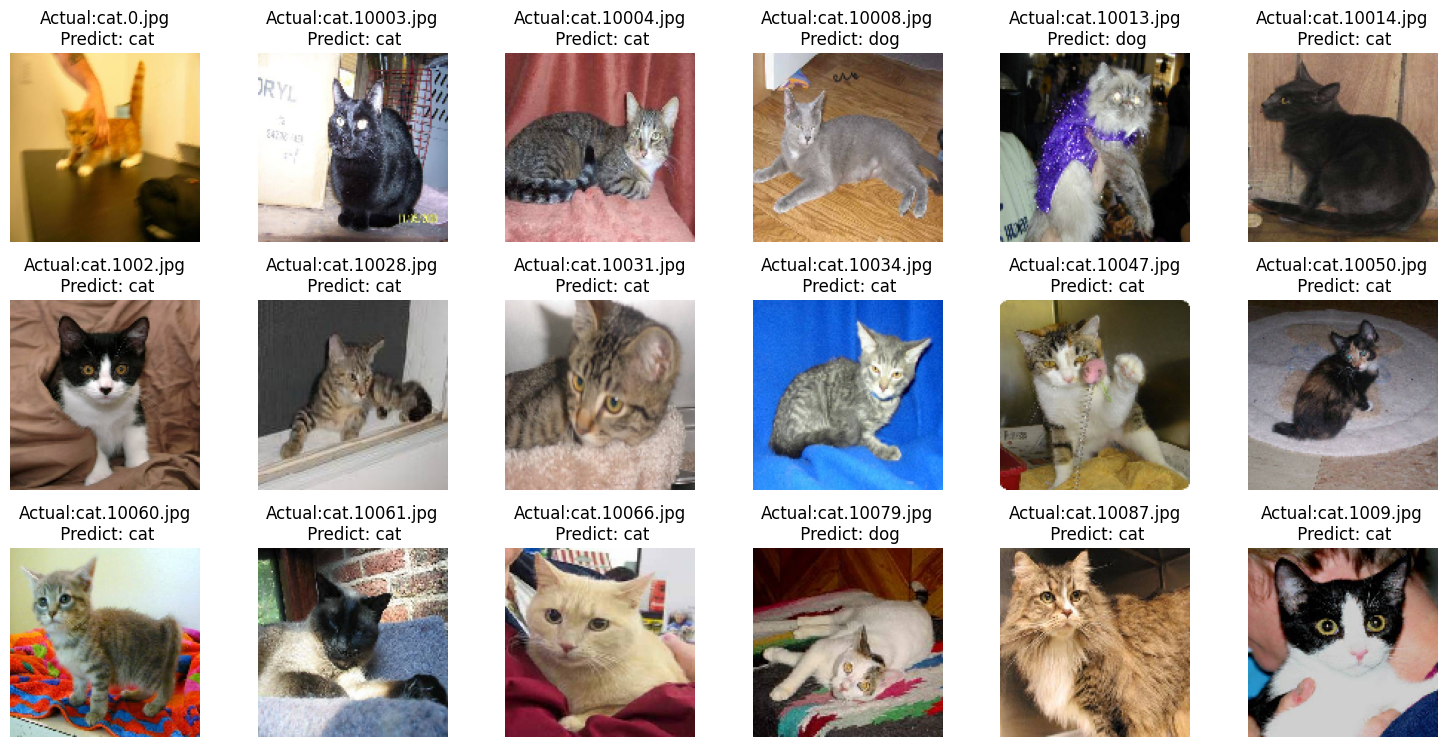

In [114]:
#Lets look at few images
sample_test = test_df.head(18)

plt.figure(figsize=(15,15))

for index, row in sample_test.iterrows():
    file_name = row['filename']
    pred_category = row['predicted_category']
    path = os.path.join(test_dir_path, file_name)
    img = load_img(path, target_size=(Image_Width,Image_Height))
    plt.subplot(6,6,index+1)
    plt.imshow(img)
    plt.title(f"Actual:{file_name}\n Predict: {'cat' if pred_category==0 else 'dog'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Thoughts
The model can be improved by decreasing learning rate, etc